# Data analyst

## Load libraries

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

## Load data

In [2]:
ROOT_PATH = os.pardir

RAW_DATA_PATH = ROOT_PATH + '\\data\\raw\\'

PROC_DATA_PATH = ROOT_PATH + '\\data\\proc\\'

In [ ]:
signals = pd.read_excel(PROC_DATA_PATH + 'measure1_wifi_smartphone.xlsx', index_col=0)
signals

## Split labels and features

In [5]:
# X = m1_wifi_df.iloc[:,:-2]
# y = m1_wifi_df.iloc[:,-2:]

X = signals.iloc[:,1:-2]
y = signals.iloc[:,-2:]

### Standarize

In [7]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X)
X = pd.DataFrame(std.transform(X), columns=X.columns)

## Split train test

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle           

X, y = shuffle(X, y, random_state=44)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=44)

## Build the model

### Linear Regression for Multioutput Regression

In [14]:
from sklearn.linear_model import LinearRegression

# define model
model = LinearRegression()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.266 (0.060)


### k-Nearest Neighbors for Multioutput Regression

In [15]:
from sklearn.neighbors import KNeighborsRegressor

# define model
model = KNeighborsRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.015 (0.008)


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.007 (0.008)


### Direct Multioutput Regression

In [17]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.035 (0.081)


### Chained Multioutput Regression

In [18]:
from sklearn.multioutput import RegressorChain

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.120 (0.088)


### Deep learning

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(20, input_dim=130, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(2))
model.compile(loss='mse',
              optimizer='adam',
              metrics = ['mae','mse'])

In [20]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 10,
    epochs = 100,
    validation_split = 0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
325/325 [==============================] - 1s 2ms/step - loss: 204.6907 - mae: 10.3614 - mse: 204.6907 - val_loss: 39.4916 - val_mae: 4.2984 - val_mse: 39.4916
Epoch 2/100
325/325 [==============================] - 0s 1ms/step - loss: 17.1625 - mae: 2.6176 - mse: 17.1625 - val_loss: 14.0799 - val_mae: 2.1520 - val_mse: 14.0799
Epoch 3/100
325/325 [==============================] - 0s 1ms/step - loss: 9.9617 - mae: 1.8533 - mse: 9.9617 - val_loss: 10.5113 - val_mae: 1.8180 - val_mse: 10.5113
Epoch 4/100
325/325 [==============================] - 1s 2ms/step - loss: 8.0824 - mae: 1.6041 - mse: 8.0824 - val_loss: 8.7994 - val_mae: 1.6274 - val_mse: 8.7994
Epoch 5/100
325/325 [==============================] - 0s 1ms/step - loss: 6.9818 - mae: 1.4553 - mse: 6.9818 - val_loss: 7.6671 - val_mae: 1.4672 - val_mse: 7.6671
Epoch 6/100
325/325 [==============================] - 1s 2ms/step - loss: 6.2134 - mae: 1.3337 - mse: 6.2134 - val_loss: 6.7549 - val_mae: 1.3394 - val_mse: 6.75

In [21]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,204.690674,10.361420,204.690674,39.491554,4.298391,39.491554,0
1,17.162470,2.617633,17.162470,14.079899,2.151986,14.079899,1
2,9.961726,1.853268,9.961726,10.511337,1.817957,10.511337,2
3,8.082372,1.604056,8.082372,8.799372,1.627368,8.799372,3
4,6.981800,1.455349,6.981799,7.667086,1.467233,7.667086,4
...,...,...,...,...,...,...,...
95,1.267856,0.409993,1.267856,0.972479,0.364875,0.972479,95
96,1.237700,0.399300,1.237700,1.036752,0.429526,1.036752,96
97,1.241100,0.395999,1.241100,1.120312,0.417211,1.120312,97
98,1.235162,0.393835,1.235162,1.056750,0.420820,1.056750,98


In [22]:
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim([0,20])
    plt.legend()

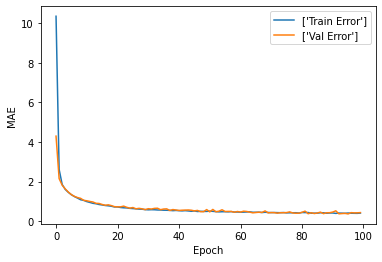

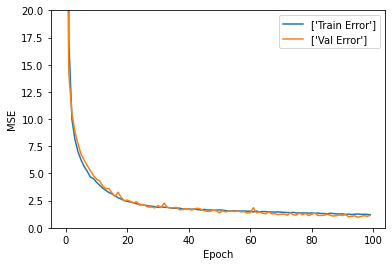

In [23]:
plot_history(history)

## Tune hyperparameters

## Test the model

In [24]:
# define model
model = KNeighborsRegressor()
# model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.predict(X_test))

[[36.  21. ]
 [26.4  5.4]
 [33.6 31.2]
 ...
 [35.4 24.6]
 [36.   9.6]
 [ 1.8  1.2]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [25]:
i = 150
# test = X_test.iloc[i:i+1, :]
print(f'Real point {y_test.iloc[i:i+1, :]}')
print(f'Point predicted {model.predict(X_test.iloc[i:i+1:, :])}')

Real point          x     y
8262  36.0  19.2
Point predicted [[36.  19.2]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("MAE:", mean_absolute_error(y_test, predictions))

c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


MSE: 0.006035502958579897
RMSE: 0.07768849952586224
MAE: 0.006982248520710062
